In [1]:
#Importing required Python packages 
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from scipy import sparse 
from sklearn import cross_validation 
from sklearn.cross_validation import ShuffleSplit, train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.learning_curve import learning_curve
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier 
from sklearn.grid_search import GridSearchCV 
from sklearn.datasets import load_digits
from pprint import pprint 

import os
import numpy as np 
import pandas as pd 
from pandas.tools.plotting import scatter_matrix 
import urllib 
import requests 
import zipfile 
from io import StringIO
import seaborn 
from sklearn.metrics import log_loss
from sklearn.externals import joblib

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

np.random.seed(sum(map(ord, "aesthetics"))) 
seaborn.set_context('notebook') 

# custom format the graphs  
plt.rcParams['figure.figsize'] = (15, 5) 
plt.style.use('ggplot')

# Set some Pandas options 
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 25) 
pd.options.display.max_colwidth = 50 


C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This m

In [2]:
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
    cv = ShuffleSplit(X_train.shape[1], n_iter=100, test_size=0.2) 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    classifier.fit(X_train, y_train)
    print("Best Estimator learned through GridSearch")
    print(classifier.best_estimator_)
    return cv, classifier.best_estimator_ 


In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [4]:
# read csv file
train = pd.read_csv('../data/zillow_realtor_homes_201804.csv')
train.head()

   zip code  size rank   price  bedroom  Nielson household rank  hotness rank  \
0     66062         57  243300        2                      74           574   
1     66062         59  347300        5                      74           574   
2     66062         68  277600        4                      74           574   
3     66062         69  215500        3                      74           574   
4     66061        256  125200        2                     398          5683   

   supply score  demand score  median days on market  
0      90.94160      95.15714                     29  
1      90.94160      95.15714                     29  
2      90.94160      95.15714                     29  
3      90.94160      95.15714                     29  
4      50.86883      73.84731                     58  

In [5]:
train.describe().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>zip code</th>\n      <th>size rank</th>\n      <th>price</th>\n      <th>bedroom</th>\n      <th>Nielson household rank</th>\n      <th>hotness rank</th>\n      <th>supply score</th>\n      <th>demand score</th>\n      <th>median days on market</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>count</th>\n      <td>354.000000</td>\n      <td>354.000000</td>\n      <td>3.540000e+02</td>\n      <td>354.000000</td>\n      <td>354.000000</td>\n      <td>354.000000</td>\n      <td>354.000000</td>\n      <td>354.000000</td>\n      <td>354.000000</td>\n    </tr>\n    <tr>\n      <th>mean</th>\n      <td>64984.943503</td>\n      <td>4517.031073</td>\n      <td>2.347398e+05</td>\n      <td>3.384181</td>\n      <td>7183.536723</td>\n      <td>3703.553672</td>\n      <td>68.560019</td>\n      <td>79.651767</td>\n      <td>46.768362</td>\n    </tr>\n    <tr>\n      <th>std</t

In [6]:
# transform zip code from category to numpy
train["zip code"] = label_encoder.fit_transform(train["zip code"].values) 



In [7]:
train.head()

   zip code  size rank   price  bedroom  Nielson household rank  hotness rank  \
0        71         57  243300        2                      74           574   
1        71         59  347300        5                      74           574   
2        71         68  277600        4                      74           574   
3        71         69  215500        3                      74           574   
4        70        256  125200        2                     398          5683   

   supply score  demand score  median days on market  
0      90.94160      95.15714                     29  
1      90.94160      95.15714                     29  
2      90.94160      95.15714                     29  
3      90.94160      95.15714                     29  
4      50.86883      73.84731                     58  

In [8]:
y = train["price"].values
# remove price to get all X values
del train["price"]
X = train.values
X_train, X_test, y_train, y_test = train_test_split(X,y)



In [9]:
param_grid={'n_estimators':[100,500,1000], 
            'learning_rate': [0.1,0.05,0.02,0.01], 
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,9,17,21], 
            'max_features':[1.0,0.3,0.1] 
           }

n_jobs=9


In [10]:
cv, est_best = GradientBooster(param_grid, n_jobs)


Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=0.1,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [11]:
# save best estimator parameters
with open('../model/gbtr_output.txt', 'a') as out:
    out.write("\n");
    out.write("Best Estimator Parameters" + '\n')
    out.write("---------------------------" + '\n')
    out.write("n_estimators: %d" %est_best.n_estimators + '\n')
    out.write("max_depth: %d" %est_best.max_depth + '\n')
    out.write("Learning Rate: %.1f" %est_best.learning_rate + '\n')
    out.write("min_samples_leaf: %d" %est_best.min_samples_leaf + '\n')
    out.write("max_features: %.1f" %est_best.max_features + '\n')
    out.write("Train R-squared: %.2f" %est_best.score(X_train,y_train) + '\n')
    out.write("\n");


C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\learning_curve.py:235: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 4 instead of 5).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


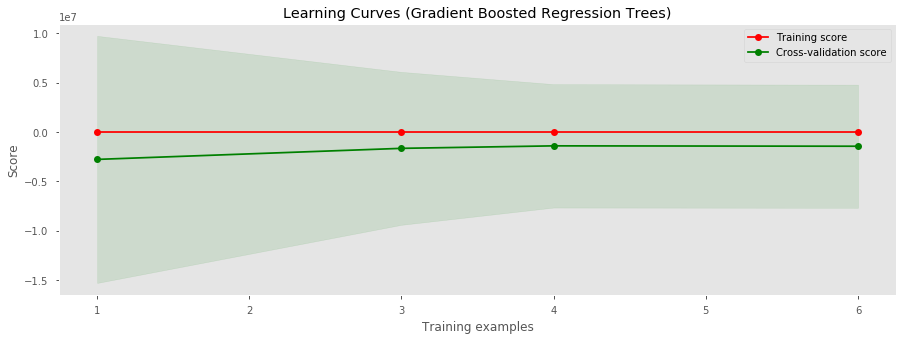

In [12]:
title = "Learning Curves (Gradient Boosted Regression Trees)" 

est_orig = GradientBoostingRegressor(n_estimators=est_best.n_estimators, 
                                      max_depth=est_best.max_depth, 
                                      learning_rate=est_best.learning_rate, 
                                      min_samples_leaf=est_best.min_samples_leaf, 
                                      max_features=est_best.max_features) 

plot_learning_curve(est_orig, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.savefig('../image/gbrt_learning_curves_orig.png')
plt.show()


C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\learning_curve.py:235: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 4 instead of 5).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


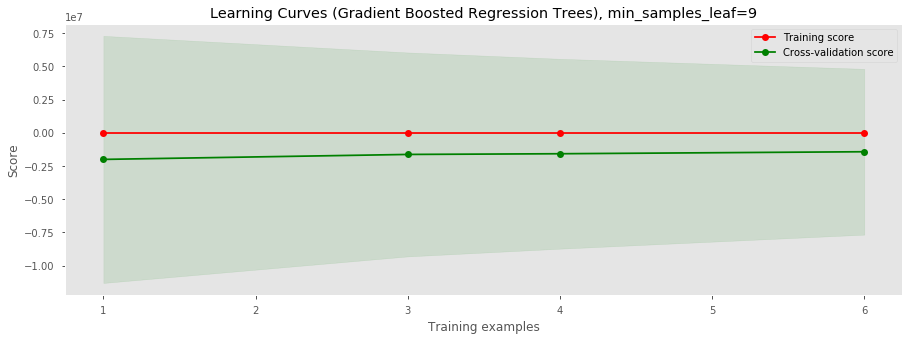

In [13]:
min_samples_leaf = 9 

title = "Learning Curves (Gradient Boosted Regression Trees), min_samples_leaf=9" 
est_leaf = GradientBoostingRegressor(n_estimators=est_best.n_estimators, 
                                      max_depth=est_best.max_depth, 
                                      learning_rate=est_best.learning_rate, 
                                      min_samples_leaf=min_samples_leaf, 
                                      max_features=est_best.max_features) 

plot_learning_curve(est_leaf, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.savefig('../image/gbrt_learning_curves_min_samples_leaf.png')
plt.show()



C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\learning_curve.py:235: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 4 instead of 5).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


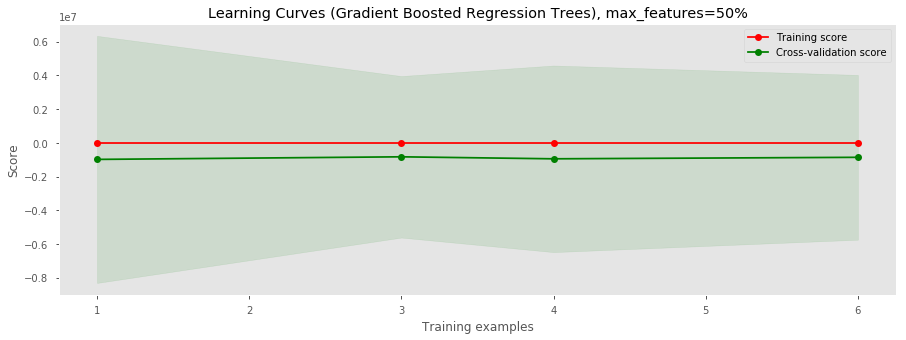

In [14]:
max_features = 0.5 

title = "Learning Curves (Gradient Boosted Regression Trees), max_features=50%" 
est_feat = GradientBoostingRegressor(n_estimators=est_best.n_estimators, 
                                      max_depth=est_best.max_depth, 
                                      learning_rate=est_best.learning_rate, 
                                      min_samples_leaf=min_samples_leaf, 
                                      max_features=max_features) 

plot_learning_curve(est_feat, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.savefig('../image/gbrt_learning_curves_max_features.png')
plt.show()



C:\Users\ng_th\Documents\software\Anaconda\lib\site-packages\sklearn\learning_curve.py:235: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 4 instead of 5).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


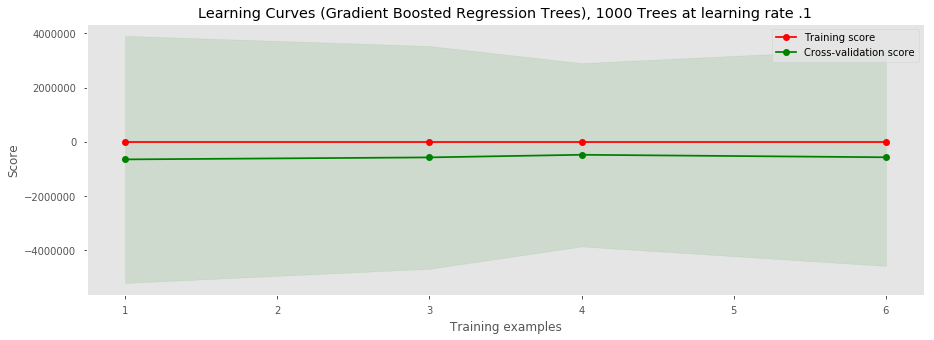

In [15]:
n_estimators = 1000
learning_rate = .1 

title = "Learning Curves (Gradient Boosted Regression Trees), 1000 Trees at learning rate .1" 
est_learn = GradientBoostingRegressor(n_estimators=n_estimators, 
                                      max_depth=est_best.max_depth, 
                                      learning_rate=learning_rate, 
                                      min_samples_leaf=min_samples_leaf, 
                                      max_features=max_features) 

plot_learning_curve(est_learn, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.savefig('../image/gbrt_learning_curves_1000_trees_rate_1.png')
plt.show()


In [16]:
est_learn.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
# Calculate the feature ranking - Top 8
importances = est_learn.feature_importances_ 
indices = np.argsort(importances)[::-1] 

print("Top 8 important features")
for f in range(8): 
    print("%d. %s (%f)" % (f + 1, train.columns[indices[f]], 
                                  importances[indices[f]]))

print("Mean Feature Importance %.6f" %np.mean(importances))
    

Top 8 important features
1. size rank (0.384213)
2. Nielson household rank (0.158404)
3. zip code (0.107409)
4. demand score (0.089059)
5. hotness rank (0.080483)
6. bedroom (0.071269)
7. supply score (0.061122)
8. median days on market (0.048041)
Mean Feature Importance 0.125000


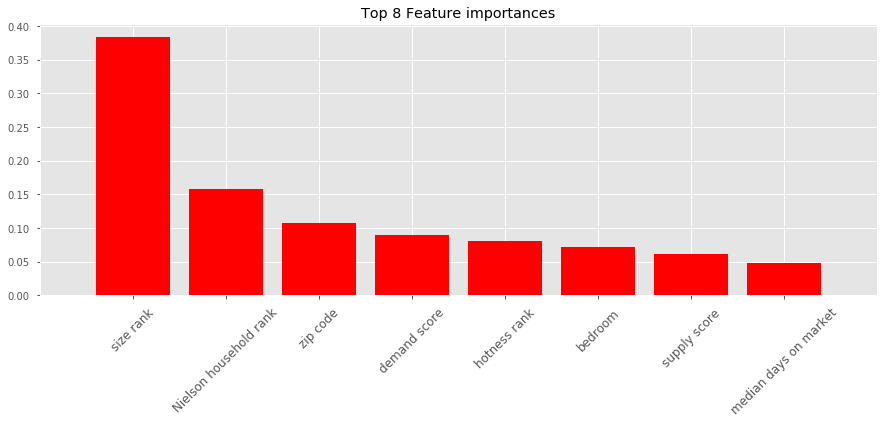

In [18]:
indices=indices[:8] 
plt.figure() 
plt.title("Top 8 Feature importances") 
plt.bar(range(8), importances[indices], color="r", align="center") 
plt.xticks(range(8), train.columns[indices], fontsize=12, rotation=45) 
plt.xlim([-1, 8]) 
plt.savefig('../image/gbrt_learning_curves_feature_importances.png')
plt.show()



In [19]:
# final estimator parameters
print("Final Estimator Parameters")
print("---------------------------")
print("n_estimators: %d" %est_learn.n_estimators)
print("max_depth: %d" %est_learn.max_depth)
print("Learning Rate: %.1f" %est_learn.learning_rate)
print("min_samples_leaf: %d" %est_learn.min_samples_leaf)
print("max_features: %.1f" %est_learn.max_features)
print("")
print("Final Train R-squared: %.2f" %est_learn.score(X_train,y_train))
print("Final Test R-squared: %.2f" %est_learn.score(X_test,y_test))


Final Estimator Parameters
---------------------------
n_estimators: 1000
max_depth: 4
Learning Rate: 0.1
min_samples_leaf: 9
max_features: 0.5

Final Train R-squared: 1.00
Final Test R-squared: 0.69


In [20]:
# predict
Xt = np.matrix([71,57,2,50,500,90,95,20])
pre_best = est_best.predict(Xt)[0]
# score on test data (accuracy)
best_acc = est_best.score(X_test, y_test)
print('best accuracy %.4f' % best_acc)


best accuracy 0.4980


In [21]:
train["zip code"] = label_encoder.inverse_transform(train["zip code"]) 



In [22]:
train.head()

   zip code  size rank  bedroom  Nielson household rank  hotness rank  \
0     66062         57        2                      74           574   
1     66062         59        5                      74           574   
2     66062         68        4                      74           574   
3     66062         69        3                      74           574   
4     66061        256        2                     398          5683   

   supply score  demand score  median days on market  
0      90.94160      95.15714                     29  
1      90.94160      95.15714                     29  
2      90.94160      95.15714                     29  
3      90.94160      95.15714                     29  
4      50.86883      73.84731                     58  

In [23]:
joblib.dump(est_best, '../model/gbtr_model_best.gbtr') 
joblib.dump(est_learn, '../model/gbtr_model_learn.gbtr') 

['../model/gbtr_model_learn.gbtr']

In [24]:
re_model_best = joblib.load('../model/gbtr_model_best.gbtr') 
re_model_learn = joblib.load('../model/gbtr_model_learn.gbtr') 


In [25]:
re_pre_best = re_model_best.predict(Xt)[0]
print(re_pre_best)

203606.893647


In [26]:
re_pre_learn = re_model_learn.predict(Xt)[0]
print(re_pre_learn)

151543.757168


In [27]:
with open('../model/gbtr_output.txt', 'a') as out:
    out.write("\n")
    out.write("Top 8 important features" + '\n')
    for f in range(8): 
        out.write("%d. %s (%f)" % (f + 1, train.columns[indices[f]], importances[indices[f]]) + '\n')

    out.write("Mean Feature Importance %.6f" %np.mean(importances) + '\n')
    out.write('\n')
    out.write("Final Estimator Parameters" + '\n')
    out.write("---------------------------" + '\n')
    out.write("n_estimators: %d" %est_learn.n_estimators + '\n')
    out.write("max_depth: %d" %est_learn.max_depth + '\n')
    out.write("Learning Rate: %.1f" %est_learn.learning_rate + '\n')
    out.write("min_samples_leaf: %d" %est_learn.min_samples_leaf + '\n')
    out.write("max_features: %.1f" %est_learn.max_features + '\n')
    out.write("accuracy: %.4f" % est_learn.score(X_test, y_test))
    out.write('\n')
    out.write("Final Train R-squared: %.2f" %est_learn.score(X_train,y_train) + '\n')
    out.write("Final Test R-squared: %.2f" %est_learn.score(X_test,y_test) + '\n')
    out.write("\n")
    out.write("Price Prediction: %.2f" %re_pre_learn + '\n')
    out.write("\n")
